0.9166666666666666
2.2333333333333334
4.633333333333333


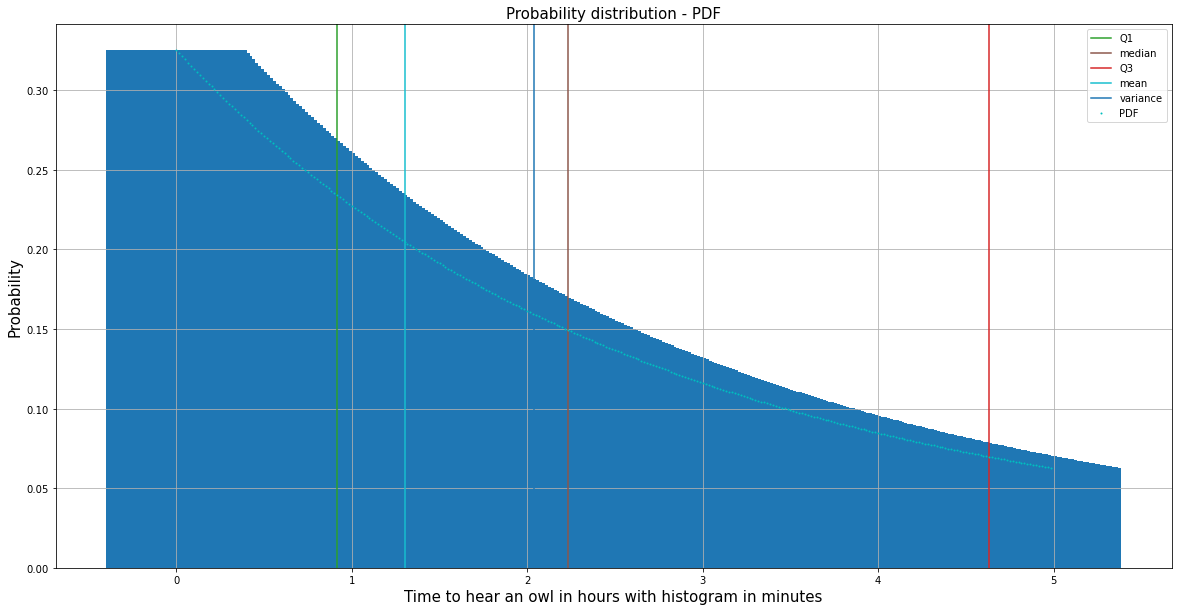

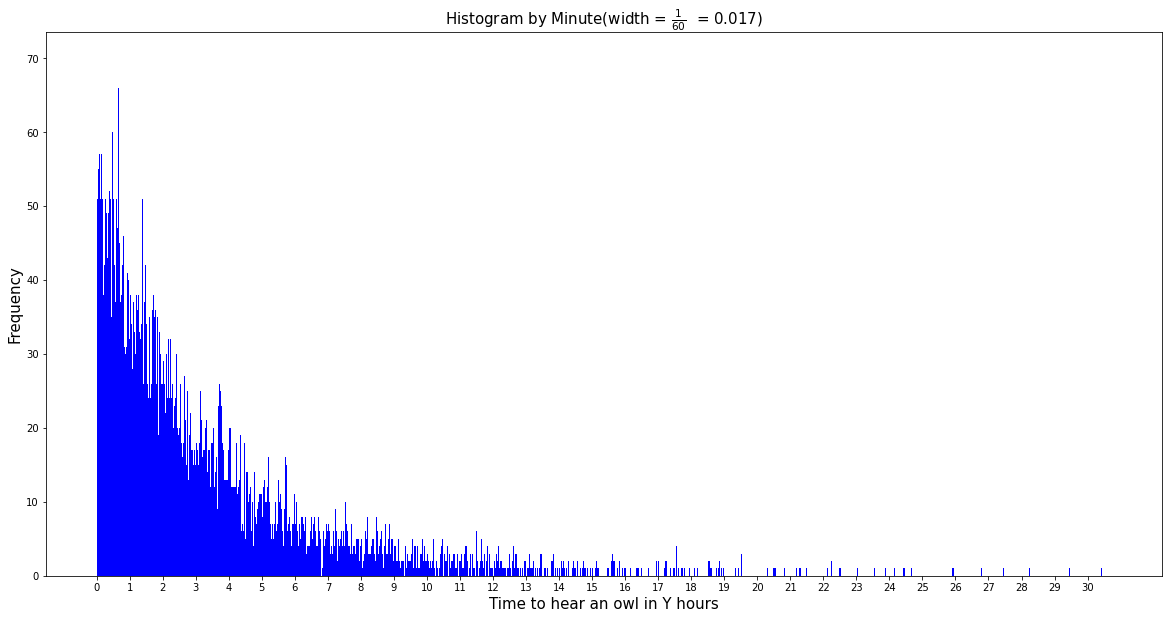

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rv_continuous

title_pdf = 'Probability distribution - PDF'
title_hist = r'Histogram by Minute(width = $\frac{1}{60}$  = 0.017)'
n = 5
start = 0
tick_increment = (1/60)

def my_pdf(y):
    return np.exp(y * -0.5) * 0.15 + np.exp(-0.25 * y) * 0.175

def my_cdf(y):
    return 1 - (np.exp(y * -0.5) * 0.3 + np.exp(-0.25 * y) * 0.7)

def my_ccdf(y):
    return 1 - (np.exp(y * -0.5) * 0.3 + np.exp(-0.25 * y) * 0.7)

def calc_quartile(quartile, cdf_val, x_vals):
    #Finding variance by summing the CDF 50
    for index , val in enumerate(cdf_val):
        if val > quartile:
            return x_vals[index]
            break

# Creating continuous distribution
class my_dist(rv_continuous):
    def _cdf(self, y):
        return my_cdf(y)

# generate data by the minute
x = np.arange(0, n, tick_increment)
my_distribution = my_dist()
p = my_pdf(x)
cdf = my_cdf(x)

#PDF
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.set_title(title_pdf, fontsize=15)
ax.set_xlabel('Time to hear an owl in hours with histogram in minutes', fontsize=15)
ax.set_ylabel('Probability', fontsize=15)


# Label pdf
print(calc_quartile(0.25, cdf, x))
print(calc_quartile(0.5, cdf, x))
print(calc_quartile(0.75, cdf, x))
plt.axvline(calc_quartile(0.25, cdf, x), label='Q1', c='tab:green', linestyle='solid')
plt.axvline(calc_quartile(0.5, cdf, x), label='median', c='tab:brown', linestyle='solid')
plt.axvline(calc_quartile(0.75, cdf, x), label='Q3', c='tab:red', linestyle='solid')
plt.axvline(1.3, label='mean', c='tab:cyan', linestyle='solid')
plt.axvline(2.04, label='variance', c='tab:blue', linestyle='solid')

plt.bar(x, p)
plt.plot(x, p, 'co', ms=1, label='PDF')
ax.grid(True)
plt.legend(loc='best', frameon=True)
plt.savefig('images/task_1_c_pdf.pdf')

#Histogram
fig, ax_hist = plt.subplots(1, 1, figsize=(20, 10))
ax_hist.set_title(title_hist, fontsize=15)
ax_hist.set_xlabel('Time to hear an owl in Y hours', fontsize=15)
ax_hist.set_ylabel('Frequency', fontsize=15)

# Get random samples for the histogram following the distribution
samples = my_distribution.rvs(size=10000)
min_num = min(samples)
max_num = max(samples)
plt.xticks(np.arange(0, round(max_num), 1))
# Width of histogram by minute which is (1/60)
bins = round((max_num-min_num)/(1/60))
plt.hist(samples, bins=bins, color='b')
# Show & save plot
plt.savefig('images/task_1_c_hist.pdf')